# Support Vector Classification


## Importing the necessary libraries and packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Importing the csv file as a dataFrame


In [2]:
df = pd.read_csv("../../../../Datasets/SocialNetworkAds.csv")
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


## Exploratory Data Analysis


Formal information about the dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


Description of the dataset


In [4]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,1.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,1.000000,29.750000,43000.000000,0.000000
50%,2.000000,37.000000,70000.000000,0.000000
75%,2.000000,46.000000,88000.000000,1.000000
max,2.000000,60.000000,150000.000000,1.000000


Checking if any null value exists


In [5]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Columns of the dataset


In [6]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Correlations between the variables


In [7]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


## Now taking 2 parts from the dataset

### X: which contains all columns except the <b>target</b> column<br>Y: which contains only the <b>target</b> column


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model


In [10]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

## Performance of the Model


In [11]:
svc_con_matrix = confusion_matrix(y_test, y_pred)
svc_acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix", "\n", svc_con_matrix, "\n")
print("Accuracy of Support Vector Classification :", svc_acc * 100, "\n")
print("Classification Report", "\n", classification_report(y_test, y_pred))

Confusion Matrix 
 [[31  1]
 [ 3  5]] 

Accuracy of Support Vector Classification : 90.0 

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        32
           1       0.83      0.62      0.71         8

    accuracy                           0.90        40
   macro avg       0.87      0.80      0.83        40
weighted avg       0.90      0.90      0.89        40



## Plotting the Confusion Matrix


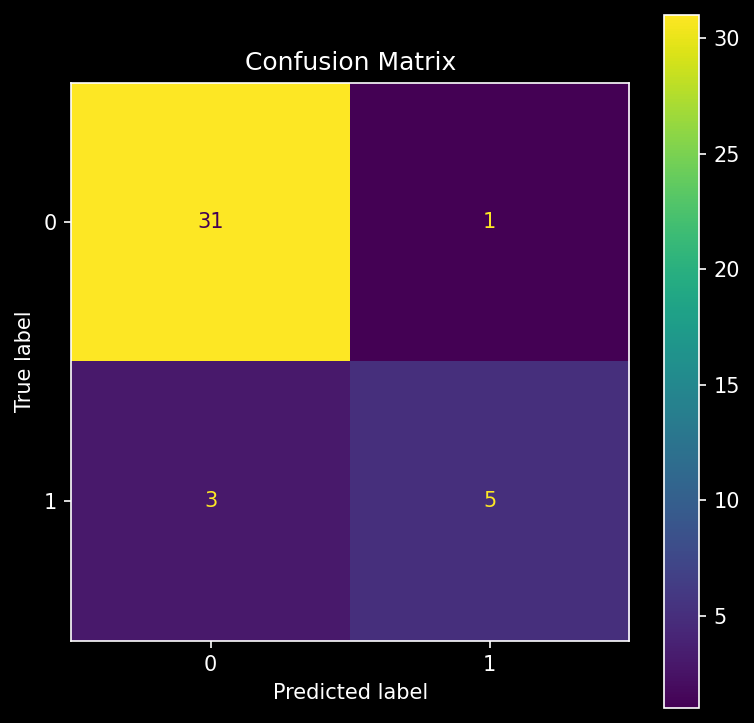

In [12]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
ConfusionMatrixDisplay(svc_con_matrix).plot(ax=ax)
plt.title("Confusion Matrix")
plt.savefig(
    "Images/Confusion_Matrix_Support_Vector_Classification.png", bbox_inches="tight"
)

## Plotting the ROC curve


In [13]:
y_score = svc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

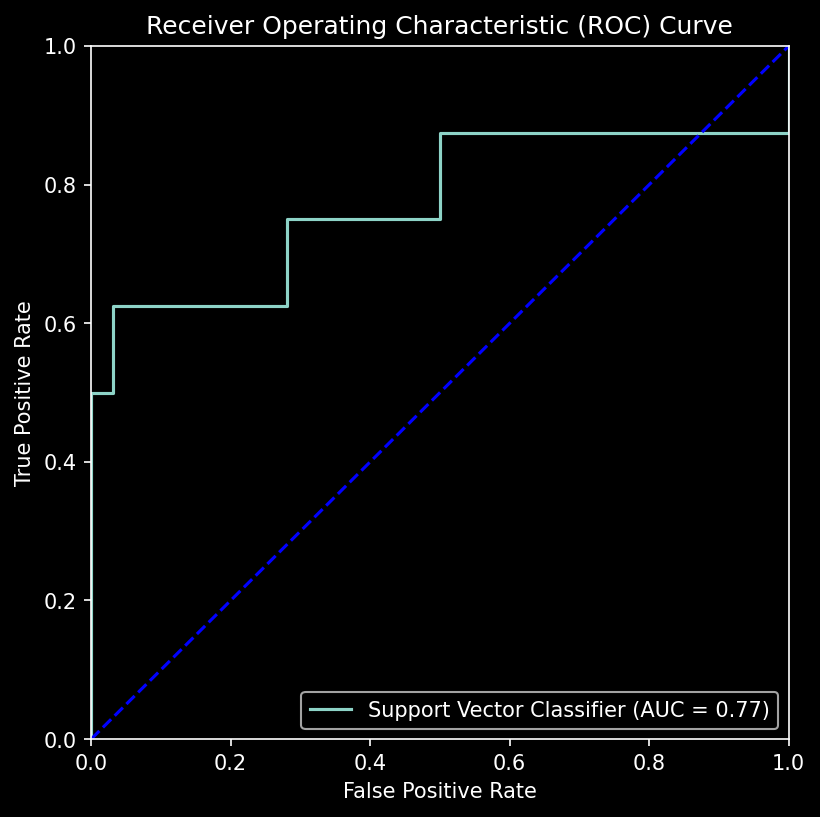

In [14]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Support Vector Classifier"
).plot(ax=ax)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.plot([0, 1], [0, 1], "b--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.savefig("Images/ROC_Curve_Support_Vector_Classification.png", bbox_inches="tight")

## Computing the AUC of ROC


In [15]:
print(
    "Area Under the Receiver Operating Characteristic Curve :",
    roc_auc_score(y_test, y_score),
)

Area Under the Receiver Operating Characteristic Curve : 0.7734375


## Saving the model


In [16]:
dump(svc, "../../../../Models/supportVectorClassifier.joblib")

['../../../../Models/supportVectorClassifier.joblib']